<a href="https://colab.research.google.com/github/s2ul2/bitamin/blob/main/1%EC%A3%BC%EC%B0%A8_%EB%94%A5%EB%9F%AC%EB%8B%9D%EA%B0%9C%EC%9A%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: ignored

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 퍼셉트론

In [21]:
import tensorflow as tf

In [22]:
# 퍼셉트론 구현
class Perceptron:
    def __init__(self):
        self.W = tf.Variable(tf.random.normal([3, 1]))

    def train(self, X):
        err = 1
        epoch, max_epochs = 0, 20
        while err > 0.0 and epoch < max_epochs:
            epoch += 1
            self.optimize(X)
            err = self.mse(Y, self.pred(X)).numpy()
            print('epoch : ', epoch, 'mse : ', err)
        
    def pred(self, X):
        return self.step(tf.matmul(X, self.W))
    
    def mse(self, Y, y_hat):
        return tf.reduce_mean(tf.square(tf.subtract(Y, y_hat)))

    def step(self, x):
        return tf.dtypes.cast(tf.math.greater(x, 0), tf.float32)
    
    def optimize(self, X):
        delta = tf.matmul(X, tf.subtract(Y, self.step(tf.matmul(X, self.W))), transpose_a = True)
        self.W.assign(self.W + delta)

## AND gate

In [23]:
# 데이터 생성
T = 1.0
F = 0.0
bias = 1.0

def get_AND_data():
    X = [
         [F, F, bias],
         [F, T, bias],
         [T, F, bias],
         [T, T, bias]
    ]
    Y = [ [F], [F], [F], [T] ]
    return X, Y

In [24]:
X, Y = get_AND_data()

In [25]:
# 학습
perceptron = Perceptron()
perceptron.train(X)

epoch :  1 mse :  0.25
epoch :  2 mse :  0.25
epoch :  3 mse :  0.0


In [26]:
# 테스트
print(perceptron.pred(X).numpy())

[[0.]
 [0.]
 [0.]
 [1.]]


## NAND Gate 구현

In [27]:
def NAND(a,b):
    input = np.array([a, b])
    weights = np.array([-0.6, -0.5])
    bias = 0.7
    value = np.sum(input*weights) + bias

    # 계단 함수가 활성화 함수
    if value <= 0:
        return 0
    else:
        return 1

In [28]:
print(NAND(0, 0))
print(NAND(0, 1))
print(NAND(1, 0))
print(NAND(1, 1))

1
1
1
0


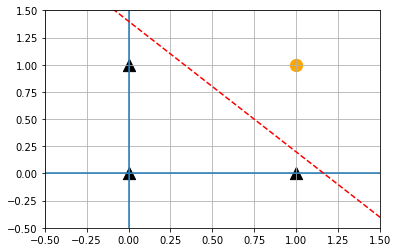

In [29]:
x1 = np.arange(-2, 2, 0.01)
x2 = np.arange(-2, 2, 0.01)
bias = 0.7
y = (0.6*x1 - bias)/-0.5

plt.axvline(x=0)
plt.axhline(y = 0)


plt.plot(x1, y, 'r--')

plt.scatter(0, 0, color = 'black', marker = '^', s = 150)
plt.scatter(0, 1, color = 'black', marker = '^', s = 150)
plt.scatter(1, 0, color = 'black', marker = '^', s = 150)
plt.scatter(1, 1, color = 'orange', marker = 'o', s = 150)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.show()

# 다층 퍼셉트론

## XOR 구현

In [30]:
def NAND(a,b):
    input = np.array([a, b])
    weights = np.array([-0.6, -0.5])
    bias = 0.7
    value = np.sum(input*weights) + bias

    # 계단 함수가 활성화 함수
    if value <= 0:
        return 0
    else:
        return 1

In [31]:
def AND(a,b):
    input = np.array([a, b])
    weights = np.array([0.4, 0.4])
    bias = -0.6
    value = np.sum(input*weights) + bias

    # 계단 함수가 활성화 함수
    if value <= 0:
        return 0
    else:
        return 1

In [32]:
def OR(a,b):
    input = np.array([a, b])
    weights = np.array([0.4, 0.5])
    bias = -0.3
    value = np.sum(input*weights) + bias

    # 계단 함수가 활성화 함수
    if value <= 0:
        return 0
    else:
        return 1

In [33]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [34]:
# 활성화 함수
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [35]:
# 입력 데이터
X = np.array([1.0, 0.5, 0.4])

W1 = np.array([ [0.1, 0.3, 0.5], [0.2, 0.4, 0.6], [0.3, 0.5, 0.7] ])
B1 = np.array([1, 1, 1])

print(W1.shape)

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

# 활성화 함수 전
print(A1)
# 활성화 함수 적용 후
print(Z1)

(3, 3)
[1.32 1.7  2.08]
[0.78918171 0.84553473 0.88894403]


In [36]:
W2 = np.array([[0.2, 0.4, 0.6], [0.1, 0.3, 0.5], [0.4, 0.6, 0.8]])
B2 = np.array([1 , 1, 1])

print(W2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(Z2)

(3, 3)
[0.83173411 0.89116528 0.93133834]


In [37]:
# 3가지 입력을 받고 이후 뉴런 2개로 들어가야 하므로 3*2 행렬이 됩니다.
W3 = np.array([ [0.1, 0.3], [-0.1, -0.5], [0.3, 0.5] ])
B3 = np.array([1, 1])

print(W3.shape)

A3 = np.dot(Z1, W3) + B3
Z3 = sigmoid(A3)

print(Z3)

(3, 2)
[0.77920645 0.77876075]


# 실습

In [38]:
# 라이브러리 불러오기
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dropout
import matplotlib.pyplot as plt

In [43]:
(train_input, train_target), (test_input, test_target) = mnist.load_data()

In [44]:
train_input[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [45]:
train_target

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [46]:
from sklearn.model_selection import train_test_split
train_input = train_input.reshape(60000, 28*28).astype('float32')/255.0
test_input = test_input.reshape(10000, 28*28).astype('float32')/255.0
train_target = keras.utils.to_categorical(train_target, 10)
test_target = keras.utils.to_categorical(test_target, 10)

In [47]:
train_target

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [48]:
tf.random.set_seed(3)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

In [49]:
# 모델 생성
model = Sequential(name = 'team6MnistModel_1')
model.add(Dense(units = 512, input_dim = (28*28), activation = 'relu', name = 'hidden1'))
model.add(Dense(units = 24, activation = 'relu', name = 'hidden2'))
model.add(Dropout(0.25))
model.add(Dense(units = 10, activation = 'softmax', name = 'output'))
model.summary()

Model: "team6MnistModel_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 512)               401920    
                                                                 
 hidden2 (Dense)             (None, 24)                12312     
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 output (Dense)              (None, 10)                250       
                                                                 
Total params: 414,482
Trainable params: 414,482
Non-trainable params: 0
_________________________________________________________________


In [50]:
# 모델 학습방법 설정
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [51]:
# 모델 저장
model.save('model-whole.h5')

In [52]:
# 저장된 모델 파일 확인
!ls -a1 * .h5

ls: cannot access '.h5': No such file or directory
model-whole.h5

sample_data:
.
..
anscombe.json
california_housing_test.csv
california_housing_train.csv
mnist_test.csv
mnist_train_small.csv
README.md


In [54]:
# 저장된 모델 불러오기
model = keras.models.load_model('model-whole.h5')

In [55]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('model-whole.h5')

In [56]:
# 조기종료, 검증 정확도가 2번(patience) 연속으로 개선되지 않을 경우 조기 종료, 이때 검증 정확도가 높은 모델 저장.
from keras.callbacks import EarlyStopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

In [57]:
# 모델 학습
from keras import callbacks
history = model.fit(train_scaled, train_target, epochs = 10, validation_split = 0.3,
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.4264 - accuracy: 0.8696 - val_loss: 0.1533 - val_accuracy: 0.9557
Epoch 2/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1897 - accuracy: 0.9468 - val_loss: 0.1113 - val_accuracy: 0.9661
Epoch 3/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1325 - accuracy: 0.9620 - val_loss: 0.0995 - val_accuracy: 0.9692
Epoch 4/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0995 - accuracy: 0.9721 - val_loss: 0.0989 - val_accuracy: 0.9719
Epoch 5/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0790 - accuracy: 0.9761 - val_loss: 0.1017 - val_accuracy: 0.9708
Epoch 6/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0651 - accuracy: 0.9810 - val_loss: 0.1028 - val_accuracy: 0.9712


In [58]:
# 검증 정확도가 가장 높은 모델을 대상으로 테스트 진행
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.1052 - accuracy: 0.9707


[0.10517209768295288, 0.9707499742507935]

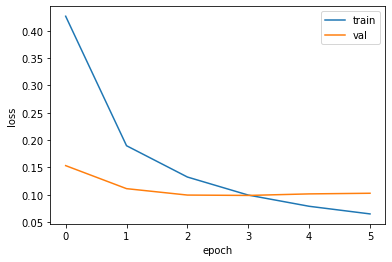

In [59]:
# 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [62]:
loss, accuracy = model.evaluate(test_input, test_target)
print('test loss : {:.3f}'.format(loss))
print('test accuracy : {:.3f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.0949 - accuracy: 0.9726
test loss : 0.095
test accuracy : 0.973
